# Neutrino Oscillations: Mathematical Basis <a class="anchor" id="top"></a>
Authors: Lodovico<br>
Last update: 04/02

## Table of Contents

* [Introduction](#intro)
* [Define constants](#constants)
* [2-flavours simulation](#2-flavours)
* [3-flavours simulation](#3-flavours)
* [Probability function](#prob)
* [Possible improvements](#improv)
* [References](#references)

## Introduction <a class="anchor" id="intro"></a>
In this notebook, I implement the mathematics of neutrino flavours as a superposition of mass eigenstates. Moreover, I introduce the time evolution of the different neutrino flavours, which leads to the phenomenon of neutrino oscillations. This is done both for the 2-flavours and 3-flavours cases. Finally, I calculate the probability that a neutrino alpha becomes a neutrino beta after a certain distance and given the energy at which it is produced.

Use this code as the basis of any future work, but please do not change anything before speaking to me (Lodovico) as we need to be careful to units, mathematics and experimental bounds. 

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# for animations --Lewis
from vpython import sphere, cylinder, color, rate, vector, canvas, arrow
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from IPython.display import Image # needed to import a remote image later --Lewis

## Define constants <a class="anchor" id="constants"></a>

Note: we are assuming the normal ordering of the mass eigenstates, i.e. $m_1 < m_2 < m_3$.

### Mixing factors
We use the most recent data available [[3]](#3). Note that the angle $\theta_{13}$ and the CP-violating phase $\delta_{CP}$ have not been measured directly yet. In particular, a slider could be added so that the user can set the value of the phase.

### Mass differences
These are also the most recent values available [[3]](#3). Only the mass differences are known, not the values of the mass eigenstates themselves. Thus, we need to set a value of the mass $m_1$ and then we assume the mass hierarchy $m_1 < m_2 < m_3$ to find the other masses. The mass hierarchy is not know either. <br>
In future work, we should consider having a slider for the mass $m_1$ and the possibility to choose a mass hierarchy with which to work. <br>
It is important to note that the mass difference is defined in the following way:
$$ \Delta m_{12}^2 = m_2^2 - m_1^2 $$

### Energy values
At this stage, for the energy values we use the energy of a neutrino produced inside the Sun in a proton-proton reaction [[1]](#1). However, we plan to have different options from which the user can choose, e.g. nuclear reactor, Sun, atmosphere. <br>
To find the energy values of the mass eigenstates, we assume they have the same momenta and that $E \sim pc$, where $E$ is the energy at which the neutrino is produced.

### Majorana phases
We are neglecting possible Majorana phases.

In [36]:
# mixing factors (converted from degrees to radians)
th12 = np.radians(33.82)
th23 = np.radians(48.3)
th13 = np.radians(8.61)
delta_CP = np.radians(222)

# mass differences
dm21_sq = 7.53*10**(-5) # eV^2
dm32_sq = 2.52*10**(-3) # eV^2

# mass eigenstates
m1 = 0.75 # eV
m2 = np.sqrt(m1*m1 + dm21_sq) # eV
m3 = np.sqrt(m2*m2 + dm32_sq) # eV

#calculate third mass difference squared
dm31_sq = m3*m3 - m1*m1 # eV^2

# set energy values
E_sun_pp = 4*10**5 # eV 
# note: add energy values from other reactions, e.g. atmospheric, nuclear reactor

# important constants:
# speed of light
c = 299792.458 # km s^-1 
# Planck constant
hbar = 6.582119569*10**(-16) # eV*s
# Astronomical unit (i.e. the distance between the Sun and the Earth)
AU = 149597870.700 # km

## 2-flavours simulation <a class="anchor" id="2-flavours"></a>

We start with the simpler case of 2-flavours oscillations, to then generalise to the 3-flavours case. <br>
The math used is taken from [[2]](#2).

### Find values for electron and muon neutrino
Values are given in eV.

In [37]:
#rotational matrix for 2-flavours case
th2f = th12 # set angle for 2-flavours (arbitrary)
rot_mat_2f = np.array([[np.cos(th2f), np.sin(th2f)], [-np.sin(th2f), np.cos(th2f)]])

mar_2f = np.array([m1, m2]) #mass eigenstates vector

nar_2f = np.dot(rot_mat_2f, mar_2f) #neutrino eigenstates vector
en_2f = nar_2f[0] #electron neutrino 
mn_2f = nar_2f[1] #muon neutrino

### Create time evolution function

In [38]:
def time_evo_2f(m1, m2, E, L):
    """Time evolution function, starting from an electron neutrino or a muon neutrino;
    Takes as inputs two neutrino mass eigenstates m1 and m2, the energy at which the neutrino is produced (in eV), 
    and the distance travelled L (in kilometers);
    The speed of the neutrino is approximated to be the speed of light;
    Returns an array whose first element is the new neutrino state formed by the superposition of the two neutrino 
    mass eigenstates if we start with an electron neutrino,
    the second element is the same but starting with a muon neutrino"""
    
    #find the energy of the two mass eigenstates
    E1 = np.sqrt(E*E + m1*m1)
    E2 = np.sqrt(E*E + m2*m2)
    
    #find time passed
    t = L / c
    
    #new mass eigenstates vector
    mar_time_evo = np.array([m1*np.real(np.exp(-E1*t*1j/hbar)), m2*np.real(np.exp(-E2*t*1j/hbar))])
    
    #calculate neutrino state
    n = np.dot(rot_mat_2f, mar_time_evo)
    
    return n


# test the function
test2f = time_evo_2f(m1, m2, E_sun_pp, 5000)
print("Starting with electron neutrino:", test2f[0], "or with muon neutrino:", test2f[1])

Starting with electron neutrino: 0.9848700530997977 or with muon neutrino: 0.19468652933723496


### Plot neutrino oscillations

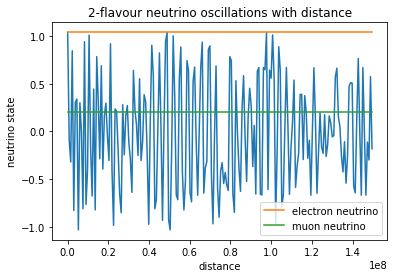

In [66]:
# plot neutrino state against distance
# assume starting with electron neutrino
arL = np.linspace(0,AU,200)
ny = time_evo_2f(m1, m2, E_sun_pp, arL)
plt.plot(arL, ny[0])
plt.xlabel("distance")
plt.ylabel("neutrino state")
plt.title("2-flavour neutrino oscillations with distance")

#add lines representing electron and muon neutrinos
aren = np.ones(len(arL))*en_2f
armn = np.ones(len(arL))*mn_2f
plt.plot(arL, aren, label="electron neutrino")
plt.plot(arL, armn, label="muon neutrino")
plt.legend()

## 3-flavours case <a class="anchor" id="3-flavours"></a>
The math used is taken from [[2]](#2) and [[4]](#4). Note that we are neglecting possible Majorana phases.

<u> Important </u>: there is a mistake in the NPP notes, i.e. reference [[2]](#2), as in the third matrix there should be a negative sign in front of the sine in the second row. 

### Find values for the three flavours
Values are given in eV.

In [87]:
# mass eigenstates vector
mar_3f = np.array([m1, m2, m3]) 

#rotational matrix
U1 = np.array([[1, 0, 0], [0, np.cos(th23), np.sin(th23)], [0, -np.sin(th23), np.cos(th23)]]) #first matrix
U2 = np.real(np.array([[np.cos(th13), 0, np.sin(th13)*np.exp(-1j*delta_CP)], [0, 1, 0], 
               [-np.sin(th13)*np.exp(1j*delta_CP), 0, np.cos(th13)]])) #second matrix
U3 = np.array([[np.cos(th12), np.sin(th12), 0], [np.sin(th12), np.cos(th12), 0], [0, 0, 1]]) #third matrix
rot_mat_3f = np.dot(U1, np.dot(U2, U3)) #final matrix

# neutrino eigenstates vector
nar_3f = np.dot(rot_mat_3f, mar_3f)
en = nar_3f[0]
mn = nar_3f[1]
tn = nar_3f[2]
print(en, mn, tn)

#check that the value obtained for the electron neutrino is within experimental bounds
assert en <= 1.1, "Error: value for electron neutrino above experimental threshold of 1.1 eV"

0.945199755436716 1.3336009502251547 -0.2054834435116446


### Time evolution function
PLEASE NOTE: I am not sure if this time evolution function is correct, as I couldn't find a formula such as the one given in the NPP notes for the 2-flavours case and therefore I had to generalise that formula. The graph obtained later on for the time evolution as a function of distance for the case in which we start with an electron neutrino does not seem quite right to me. I will look into this and ask Dr Korn if my function is correct. In the meantime you can work with this function.

In [88]:
def time_evo_3f(m1, m2, m3, E, L):
    """Time evolution function, starting from an electron neutrino, a muon neutrino or a tau neutrino;
    Takes as inputs the three neutrino mass eigenstates m1, m2 and m3, the energy at which the neutrino is produced (in eV), 
    and the distance travelled L (in kilometers);
    The speed of the neutrino is approximated to be the speed of light;
    Returns an array whose first element is the new neutrino state formed by the superposition of the two neutrino 
    mass eigenstates if we start with an electron neutrino,
    the second and third elements are the same but starting with a muon neutrino or a tau neutrino respectively"""
    
    #find the energy of the two mass eigenstates
    E1 = np.sqrt(E*E + m1*m1)
    E2 = np.sqrt(E*E + m2*m2)
    E3 = np.sqrt(E*E + m3*m3)
    
    #find time passed
    t = L / c
    
    #new mass eigenstates vector
    mar_time_evo = np.array([m1*np.real(np.exp(-E1*t*1j/hbar)), m2*np.real(np.exp(-E2*t*1j/hbar)), 
                             m3*np.real(np.exp(-E3*t*1j/hbar))])

    #calculate neutrino state
    n = np.dot(rot_mat_3f, mar_time_evo)
    
    return n


# test the function
test3f = time_evo_3f(m1, m2, m3, E_sun_pp, 5000)
print("Starting with electron neutrino:", test3f[0], "or with muon neutrino:", test3f[1], "or with tau neutrino:", test3f[2])

Starting with electron neutrino: 0.8914927955828749 or with muon neutrino: 1.2829353748295729 or with tau neutrino: -0.17603643874915087


### Plot neutrino states as function of distance

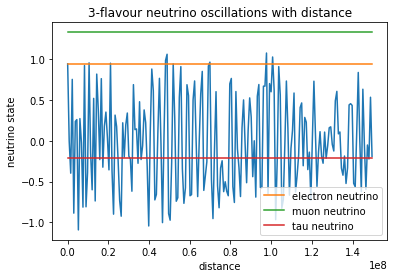

In [89]:
# assume starting with electron neutrino
ny_3f = time_evo_3f(m1, m2, m3, E_sun_pp, arL)
plt.plot(arL, ny_3f[0])
plt.xlabel("distance")
plt.ylabel("neutrino state")
plt.title("3-flavour neutrino oscillations with distance")

#add lines representing electron and muon neutrinos
aren = np.ones(len(arL))*en
armn = np.ones(len(arL))*mn
artn = np.ones(len(arL))*tn
plt.plot(arL, aren, label="electron neutrino")
plt.plot(arL, armn, label="muon neutrino")
plt.plot(arL, artn, label="tau neutrino")
plt.legend()

## Probability function <a class="anchor" id="prob"></a>
Calculates probability of transition from an initial neutrino of flavour $\alpha$ to a neutrino of flavour $\beta$, where $\alpha, \beta = e, \mu, \tau$. Uses formula given in page 27 of [[2]](#2).

In [90]:
def prob_transition(alpha, beta, E, L):
    """Calculates the probability of a transition between an initial neutrino alpha to a neutrino beta
    Takes as inputs the initial and final neutrino flavours alpha and beta, 
    the energy at which the neutrino is produced E (in eV),
    and the distance travelled by the particle L (in km)
    Returns the probability of the transition"""
    
    if (alpha == "electron" and beta == "muon") or (alpha == "muon" and beta == "electron"): 
        ar = np.array([th12, dm21_sq])
    elif (alpha == "electron" and beta == "tau") or (alpha == "tau" and beta == "electron"):
        ar = np.array([th13, dm31_sq])
    elif (alpha == "muon" and beta == "tau") or (alpha == "tau" and beta == "muon"):
        ar = np.array([th23, dm32_sq])
    else:
        return "Error"
        
    arg = 1.27*ar[1]*L/E
        
    P = np.sin(2*ar[0])*np.sin(2*ar[0])*np.sin(arg)*np.sin(arg)
    
    return P

#test:
pmn_test = prob_transition("electron", "muon", E_sun_pp, AU)*100
ptn_test = prob_transition("electron", "tau", E_sun_pp, AU)*100
print('The probability that the electron neutrino becomes a muon neutrino is %.2f' % pmn_test, '%')
print('The probability that the electron neutrino becomes a tau neutrino is %.2f' % ptn_test, '%')

The probability that the electron neutrino becomes a muon neutrino is 0.11 %
The probability that the electron neutrino becomes a tau neutrino is 7.80 %


## Possible improvements <a class="anchor" id="improv"></a>

* Add energies at which neutrinos are produces by other sources 
* Check that the mathematics of the 3-flavours evolution function are correct
* Make sure that the probability function is correct

## References <a class="anchor" id="references"></a>

[1] <a class="anchor" id="1"></a> Wikipedia, <i> Solar neutrino </i>,
https://en.wikipedia.org/wiki/Solar_neutrino <br>
[2] <a class="anchor" id="2"></a> Dr Emily Nurse, Dr Andreas Korn, Nuclear and Particle Physics notes, pp. 25-28 <br>
[3] <a class="anchor" id="3"></a> http://www.nu-fit.org/ <br>
[4] <a class="anchor" id="4"></a> https://www.nobelprize.org/uploads/2018/06/advanced-physicsprize2015.pdf

##### Return to top
[click here](#top)